## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: 
- (1) Can pyschological factors detect/predict left-handedness?
- (2) Is there association between personality/traits and left-handedness ?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# Import logistic regression
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("data.csv", sep="\t")
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: (1) The participant should have clear understanding of the surveys and consent is given.
(2) It should maintain confidential

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [4]:
df.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [5]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [6]:
#check if there's any field that has null values
df.isnull().sum().sum()

0

In [7]:
df["hand"].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [8]:
left_handed = df[df['hand'] == 2]
corr = left_handed.corr()

<AxesSubplot:>

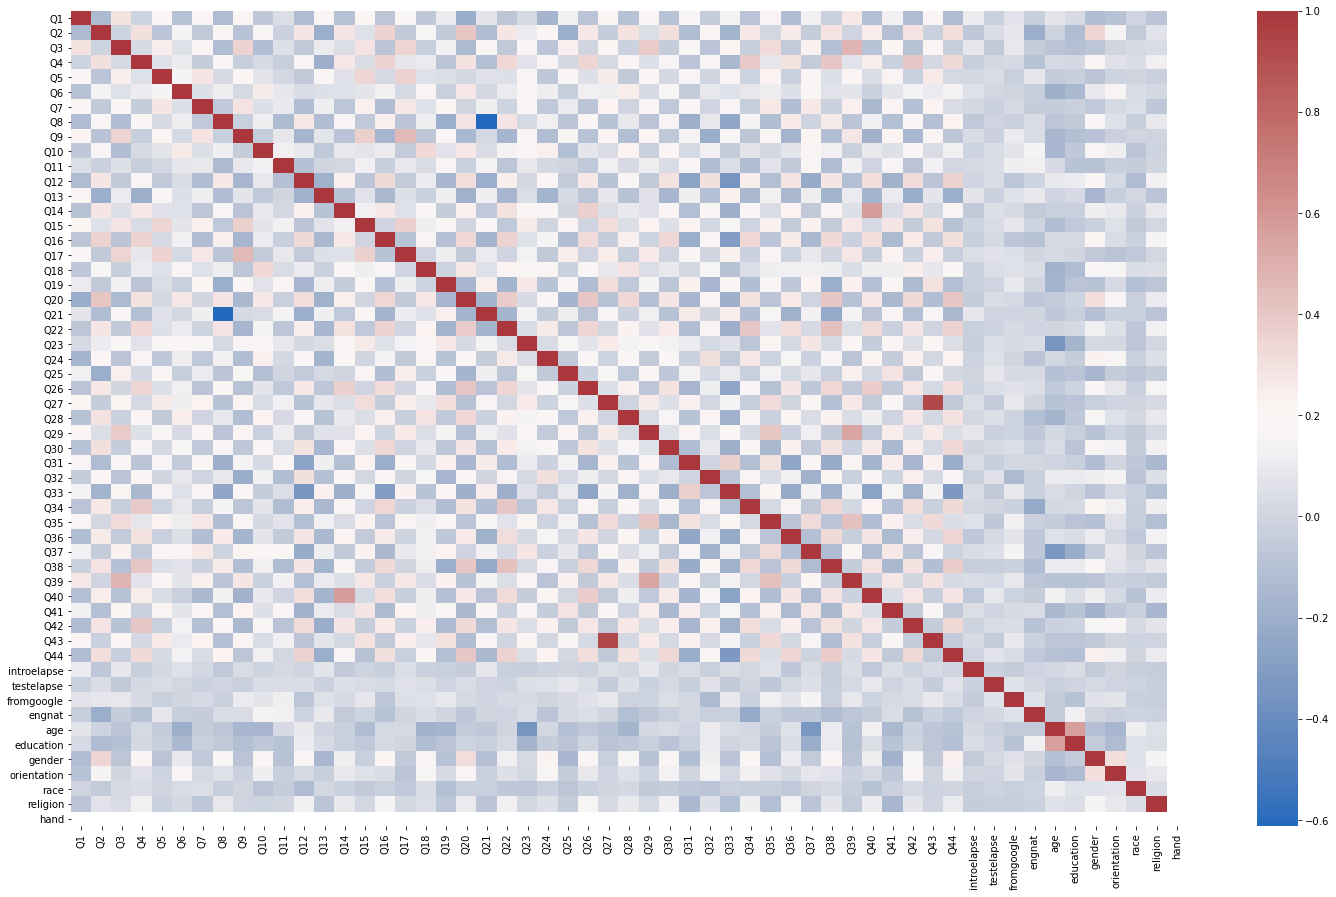

In [9]:
plt.figure(figsize=(25,15))
sns.heatmap(corr, cmap="vlag")

Q27 and Q43 has 100% correlation

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification, since the target response is predicting label/discrete (left-handed:yes or no). 

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: We standardize our variables when the features have varying degrees of magnitude, range, and units. Example would be features like (1) size in square foot in hundreds or thousands (2) no. of bedroom or no. of car that can fit in the garage (maybe from 0-10).

Ref: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


### 7. Give an example of when we might not standardize our variables.

Answer: When the features has the same units/range, or if we are building models that are not sensitive to the variability of the features (e.g. Decision Tree)

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer:  If using KNN, we may need to it is very sensitive to the degree of our variables. 
*(For other regression models, maybe no? since Q1 to Q44 has all in the range between 0-5??)*

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

In [10]:
df["hand"].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [11]:
#0 no response
#1 Right handed
#2 Left handed
#3 Both

#Assign left hand is True if hand is 2 or 3
df["hand"] = df["hand"].map(lambda x: 1 if (x==2 or x==3) else 0)
df.rename(columns={"hand":"left_hand"}, inplace=True)
df["left_hand"].value_counts()

0    3553
1     631
Name: left_hand, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer:  Not sure, yet.. let me get back to this later!!!

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [12]:
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44']]
y= df["left_hand"]

In [13]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52, stratify=y)

In [14]:
#scale
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [15]:
def knn_fit(neighbor):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    
    return(knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test))

In [16]:
model_result = {}

In [17]:
(train, test) = knn_fit(3)
print("Train:", train,"Test:",test)
model_result['KNN-3'] = {"Train Score": train, "Test Score": test}

Train: 0.8792224346717654 Test: 0.7724665391969407


In [18]:
(train, test) = knn_fit(5)
print("Train:", train,"Test:",test)
model_result['KNN-5'] = {"Train Score": train, "Test Score": test}

Train: 0.8623326959847036 Test: 0.8135755258126195


In [19]:
(train, test) = knn_fit(15)
print("Train:", train,"Test:",test)
model_result['KNN-15'] = {"Train Score": train, "Test Score": test}

Train: 0.8499043977055449 Test: 0.8479923518164436


In [20]:
(train, test) = knn_fit(25)
print("Train:", train,"Test:",test)
model_result['KNN-25'] = {"Train Score": train, "Test Score": test}

Train: 0.8492670490758445 Test: 0.8489483747609943


In [21]:
model_result

{'KNN-3': {'Train Score': 0.8792224346717654,
  'Test Score': 0.7724665391969407},
 'KNN-5': {'Train Score': 0.8623326959847036,
  'Test Score': 0.8135755258126195},
 'KNN-15': {'Train Score': 0.8499043977055449,
  'Test Score': 0.8479923518164436},
 'KNN-25': {'Train Score': 0.8492670490758445,
  'Test Score': 0.8489483747609943}}

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: Yes, default is ’l2’ which is Ridge

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer:No

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [22]:
#this is lasso alpha 1 -- how to specify alpha?
logr_lasso1 = LogisticRegression(penalty='l1', solver='saga', C=1)
logr_lasso1.fit(X_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [23]:
#this is lasso alpha 10 -- how to specify alpha?
logr_lasso10 = LogisticRegression(penalty='l1', solver='saga', C=10)
logr_lasso10.fit(X_train_scaled, y_train)

LogisticRegression(C=10, penalty='l1', solver='saga')

In [24]:
#this is ridge alpha 1 -- how to specify alpha?
logr_ridge1 = LogisticRegression(penalty='l2', C=1)
logr_ridge1.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [25]:
#this is ridge alpha 10 -- how to specify alpha?
logr_ridge10 = LogisticRegression(penalty='l2', C=10)
logr_ridge10.fit(X_train_scaled, y_train)

LogisticRegression(C=10)

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer:

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

Answer:

In [26]:
(train, test) = (logr_lasso1.score(X_train, y_train),logr_lasso1.score(X_test, y_test))
print("Train:", train,"Test:",test)
model_result['Lasso-1'] = {"Train Score": train, "Test Score": test}

Train: 0.8492670490758445 Test: 0.8489483747609943


In [27]:
(train, test) = (logr_lasso10.score(X_train, y_train),logr_lasso10.score(X_test, y_test))
print("Train:", train,"Test:",test)
model_result['Lasso-10'] = {"Train Score": train, "Test Score": test}

Train: 0.8492670490758445 Test: 0.8489483747609943


In [28]:
(train, test) = (logr_ridge1.score(X_train, y_train),logr_ridge1.score(X_test, y_test))
print("Train:", train,"Test:",test)
model_result['Ridge-1'] = {"Train Score": train, "Test Score": test}

Train: 0.8492670490758445 Test: 0.8489483747609943


In [29]:
(train, test) = (logr_ridge10.score(X_train, y_train),logr_ridge10.score(X_test, y_test))
print("Train:", train,"Test:",test)
model_result['Ridge-10'] = {"Train Score": train, "Test Score": test}

Train: 0.8492670490758445 Test: 0.8489483747609943


In [30]:
df_models = pd.DataFrame(model_result)
df_models.T

,Train Score,Test Score
KNN-3,0.879222,0.772467
KNN-5,0.862333,0.813576
KNN-15,0.849904,0.847992
KNN-25,0.849267,0.848948
Lasso-1,0.849267,0.848948
Lasso-10,0.849267,0.848948
Ridge-1,0.849267,0.848948
Ridge-10,0.849267,0.848948


### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: k = 3

The train score is higher (87%) and test score is lower (77%)

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases, variance decreases.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: 
1. Increase K
2. Simplify the model
3. Remove outliers

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: They all have the same result

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: In the models above, C did not have any effect on the score.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer:

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: If it is overfitting, try to remove outliers, make the model more simple by reducing number of features, or use regularization

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: Logistic regression as the model can be interpreted thru coefficients for each features

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [31]:
logr_lasso1.coef_

array([[ 0.01789363,  0.01643394,  0.00034319, -0.02108608,  0.06064863,
        -0.07049718,  0.02295855, -0.14550454, -0.03601664, -0.03036047,
         0.0448368 ,  0.0382116 , -0.00272523, -0.04816058, -0.04228936,
         0.08589353,  0.05865017, -0.04985599, -0.04246774, -0.07602099,
        -0.05313228, -0.12341055, -0.05230567, -0.05548811,  0.02946232,
         0.09722013,  0.2167866 ,  0.11241256,  0.02285277, -0.00722794,
         0.01710174,  0.        ,  0.07828703, -0.01555642,  0.21045482,
        -0.06468702, -0.01650695,  0.15131964, -0.13150656, -0.03435431,
        -0.05682078, -0.10242189, -0.26055525,  0.095759  ]])

Answer: Q1 is 0.01789443.
This means that for a one-unit increase in Q1, we expect a 0.017 increase in the log-odds of the dependent variable left-handed.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: I think either Ridge or Lasso, as they have built-in regularization

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

There is no strong link between left-handedness and particular traits.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)